<a href="https://colab.research.google.com/github/DIVASRAJAN/yolov8_numberplate/blob/main/implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install tesseract-ocr

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import pytesseract

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
class LicensePlateDetector:
    def __init__(self):
        self.model = YOLO('/content/drive/MyDrive/Yolo/best(1).pt')

    def detect_license_plate(self, image):
        if isinstance(image, str):
            image = cv2.imread(image)
            # print('str')
        elif isinstance(image, np.ndarray):
            image = image.copy()
            # print('array')
        else:
            raise ValueError("Input must be either a string (image file path) or a NumPy array")

        results = self.model.predict(image)
        # result in tensor format changing into numpy array
        coordinates = results[0].boxes.xyxy.cpu().numpy()
        # bounding box of number plate
        x1, y1, x2, y2 = coordinates[0]
        # bounding box of car
        x3,y3,x4,y4 = coordinates[2]
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.rectangle(image, (int(x3), int(y3)), (int(x4), int(y4)), (0, 255, 0), 2)
        # crop the image
        roi = image[int(y1):int(y2), int(x1):int(x2)]
        rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        text = pytesseract.image_to_string(rgb)
        cv2.putText(image, text, (int(x3), int(y3) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()



0: 640x640 2 number_plates, 2 cars, 248.4ms
Speed: 7.7ms preprocess, 248.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


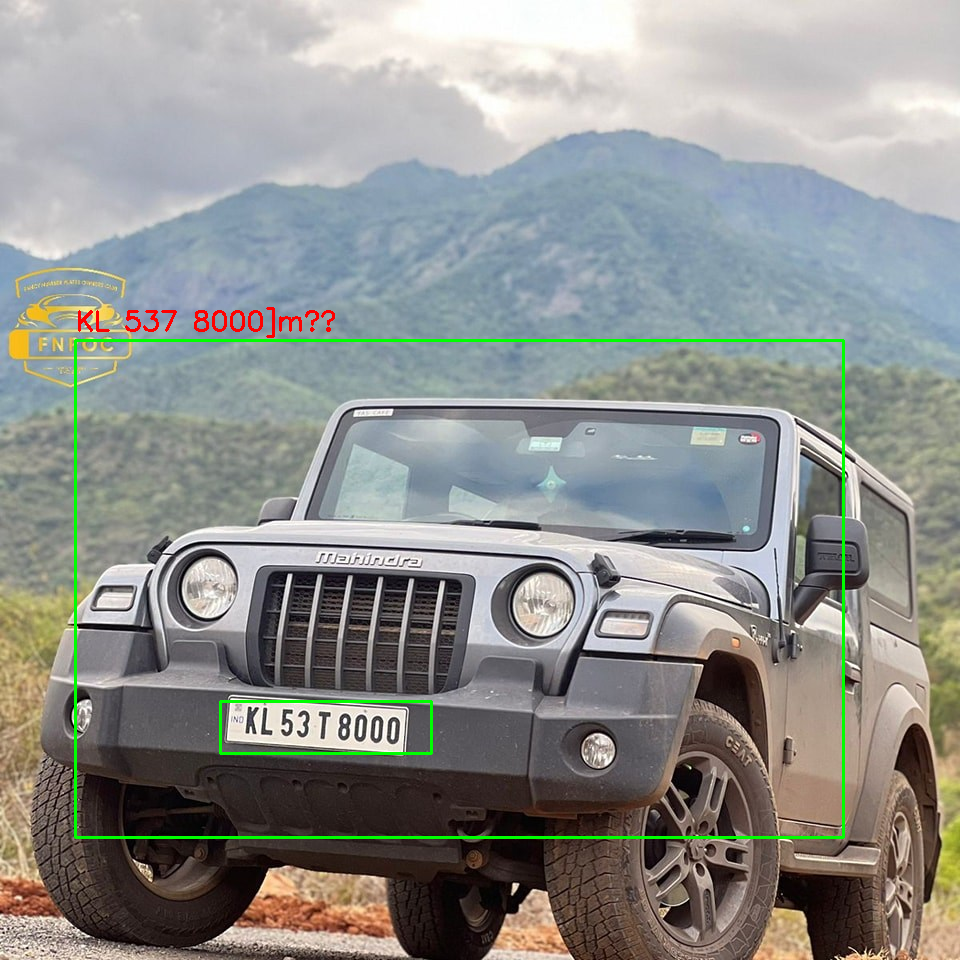

In [ ]:
plate = LicensePlateDetector()
plate.detect_license_plate('predict.jpeg')


0: 640x640 2 number_plates, 2 cars, 440.7ms
Speed: 5.8ms preprocess, 440.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


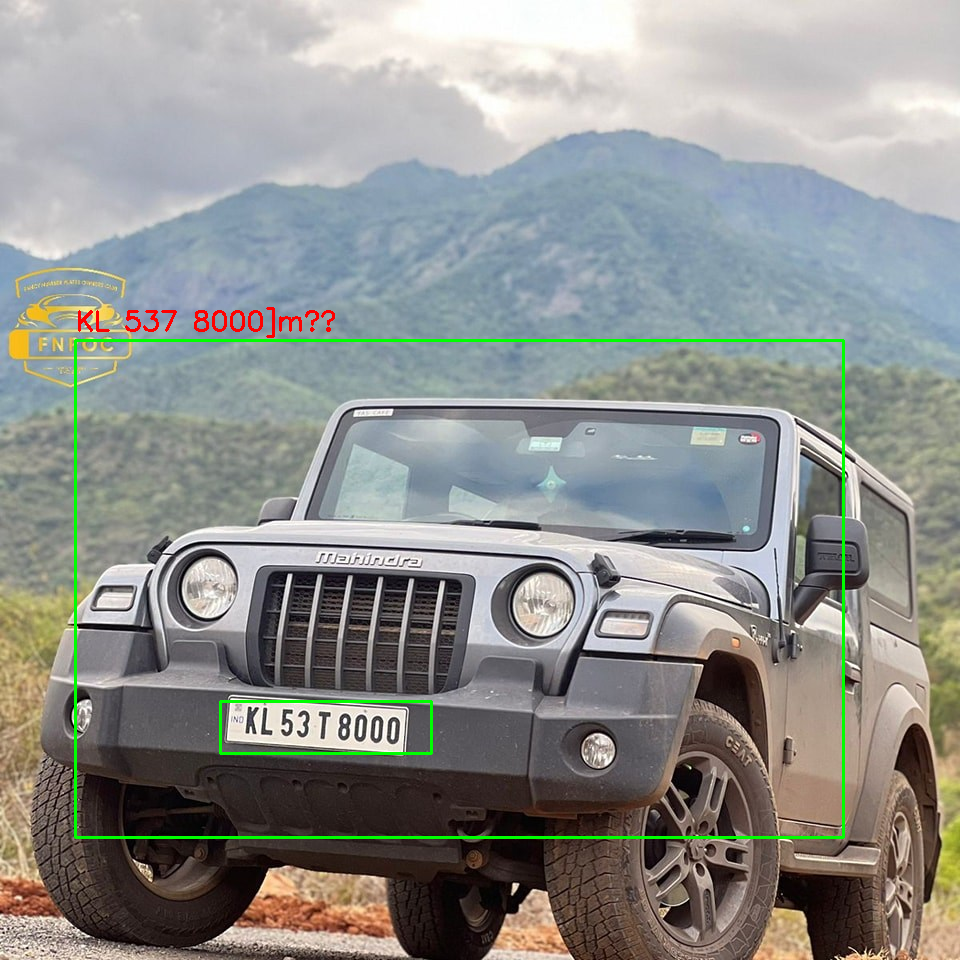

In [ ]:
#numpy array as input
plate = LicensePlateDetector()
img=cv2.imread('predict.jpeg')
plate.detect_license_plate(img)

In [ ]:
!python3 --version

Python 3.10.12


In [ ]:
pip show pytesseract

Name: pytesseract
Version: 0.3.10
Summary: Python-tesseract is a python wrapper for Google's Tesseract-OCR
Home-page: https://github.com/madmaze/pytesseract
Author: Samuel Hoffstaetter
Author-email: samuel@hoffstaetter.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, Pillow
Required-by: 


In [ ]:
pip show opencv-python

Name: opencv-python
Version: 4.8.0.76
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug, ultralytics
